## Data Wrangling

In [1]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df = pd.read_csv('marketing_sample_for_naukri_com-jobs__20190701_20190830__30k_data.csv')

In [3]:
df.head()

,Uniq Id,Crawl Timestamp,Job Title,Job Salary,Job Experience Required,Key Skills,Role Category,Location,Functional Area,Industry,Role
0,9be62c49a0b7ebe982a4af1edaa7bc5f,2019-07-05 01:46:07 +0000,Digital Media Planner,Not Disclosed by Recruiter,5 - 10 yrs,Media Planning| Digital Media,Advertising,Mumbai,"Marketing , Advertising , MR , PR , Media Plan...","Advertising, PR, MR, Event Management",Media Planning Executive/Manager
1,3c52d436e39f596b22519da2612f6a56,2019-07-06 08:04:50 +0000,Online Bidding Executive,Not Disclosed by Recruiter,2 - 5 yrs,pre sales| closing| software knowledge| clien...,Retail Sales,"Pune,Pune","Sales , Retail , Business Development","IT-Software, Software Services",Sales Executive/Officer
2,ffad8a2396c60be2bf6d0e2ff47c58d4,2019-08-05 15:50:44 +0000,Trainee Research/ Research Executive- Hi- Tec...,Not Disclosed by Recruiter,0 - 1 yrs,Computer science| Fabrication| Quality check|...,R&D,Gurgaon,"Engineering Design , R&D","Recruitment, Staffing",R&D Executive
3,7b921f51b5c2fb862b4a5f7a54c37f75,2019-08-05 15:31:56 +0000,Technical Support,"2,00,000 - 4,00,000 PA.",0 - 5 yrs,Technical Support,Admin/Maintenance/Security/Datawarehousing,Mumbai,"IT Software - Application Programming , Mainte...","IT-Software, Software Services",Technical Support Engineer
4,2d8b7d44e138a54d5dc841163138de50,2019-07-05 02:48:29 +0000,Software Test Engineer -hyderabad,Not Disclosed by Recruiter,2 - 5 yrs,manual testing| test engineering| test cases|...,Programming & Design,Hyderabad,IT Software - QA & Testing,"IT-Software, Software Services",Testing Engineer


In [4]:
df.shape

(30000, 11)

In [5]:
df.duplicated().sum()

0

In [6]:
df.isna().sum()

Uniq Id                       0
Crawl Timestamp               0
Job Title                   575
Job Salary                   50
Job Experience Required     573
Key Skills                 1271
Role Category              2305
Location                    577
Functional Area             573
Industry                    573
Role                        901
dtype: int64

there are 23884 unique jobs in this data, filling nan values as "Not Disclosed by Recruiter"

In [7]:
df['Job Title'] = df['Job Title'].str.strip(' ')

In [8]:
print(df['Job Title'].nunique())
df['Job Title'].unique()

23677


array(['Digital Media Planner', 'Online Bidding Executive',
       'Trainee Research/ Research Executive- Hi- Tech Operations', ...,
       'Assoc. Prof.- CS', 'Application/Cyber Security Specialist-Pune',
       'Press Release Writer - SEO'], dtype=object)

In [9]:
df.fillna(value={'Job Title':'Not Disclosed by Recruiter'}, inplace=True)

In [10]:
df.isna().sum()

Uniq Id                       0
Crawl Timestamp               0
Job Title                     0
Job Salary                   50
Job Experience Required     573
Key Skills                 1271
Role Category              2305
Location                    577
Functional Area             573
Industry                    573
Role                        901
dtype: int64

In [11]:
df['Job Title'].value_counts()

Not Disclosed by Recruiter                                                575
Sales Executive                                                           121
Business Development Executive                                            121
PHP Developer                                                             117
Business Development Manager                                              100
                                                                         ... 
Walk-in Interviews at KPMG For Background Verification/backend Profile      1
International bpo for technical sales process                               1
AGILE PROCESS                                                               1
Reviewer ( Ra-iv) - Regulatory Affairs (formulations)                       1
Press Release Writer - SEO                                                  1
Name: Job Title, Length: 23678, dtype: int64

### Job salary

filling 50 nan values as 'Not Disclosed by Recruiter'

In [12]:
df['Job Salary'].unique()

array([' Not Disclosed by Recruiter ', ' 2,00,000 - 4,00,000 PA. ',
       ' 7,00,000 - 17,00,000 PA. ', ..., 'INR 14,00,000 - 15,00,000 PA.',
       ' INR 1,75,000 - 2,75,000 PA. ', 'INR 7,00,000 - 8,00,000 PA.'],
      dtype=object)

In [146]:
df['Job Salary'] = df['Job Salary'].str.strip(' ')

In [13]:
df['Job Salary'].isna().sum()

50

In [14]:
df.fillna(value={'Job Salary': 'Not Disclosed by Recruiter'}, inplace=True)

In [15]:

df['Salray Range (start)'] = df['Job Salary'].str.extract('([\d]+[\d,{1}]+)')
df

,Uniq Id,Crawl Timestamp,Job Title,Job Salary,Job Experience Required,Key Skills,Role Category,Location,Functional Area,Industry,Role,Salray Range (start)
0,9be62c49a0b7ebe982a4af1edaa7bc5f,2019-07-05 01:46:07 +0000,Digital Media Planner,Not Disclosed by Recruiter,5 - 10 yrs,Media Planning| Digital Media,Advertising,Mumbai,"Marketing , Advertising , MR , PR , Media Plan...","Advertising, PR, MR, Event Management",Media Planning Executive/Manager,NaN
1,3c52d436e39f596b22519da2612f6a56,2019-07-06 08:04:50 +0000,Online Bidding Executive,Not Disclosed by Recruiter,2 - 5 yrs,pre sales| closing| software knowledge| clien...,Retail Sales,"Pune,Pune","Sales , Retail , Business Development","IT-Software, Software Services",Sales Executive/Officer,NaN
2,ffad8a2396c60be2bf6d0e2ff47c58d4,2019-08-05 15:50:44 +0000,Trainee Research/ Research Executive- Hi- Tech...,Not Disclosed by Recruiter,0 - 1 yrs,Computer science| Fabrication| Quality check|...,R&D,Gurgaon,"Engineering Design , R&D","Recruitment, Staffing",R&D Executive,NaN
3,7b921f51b5c2fb862b4a5f7a54c37f75,2019-08-05 15:31:56 +0000,Technical Support,"2,00,000 - 4,00,000 PA.",0 - 5 yrs,Technical Support,Admin/Maintenance/Security/Datawarehousing,Mumbai,"IT Software - Application Programming , Mainte...","IT-Software, Software Services",Technical Support Engineer,"2,00,000"
4,2d8b7d44e138a54d5dc841163138de50,2019-07-05 02:48:29 +0000,Software Test Engineer -hyderabad,Not Disclosed by Recruiter,2 - 5 yrs,manual testing| test engineering| test cases|...,Programming & Design,Hyderabad,IT Software - QA & Testing,"IT-Software, Software Services",Testing Engineer,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
29995,3510f2146b514f112eaa9706a16b3900,2019-07-06 21:12:51 +0000,MTS-Software-Engineer,Not Disclosed by Recruiter,9 - 12 yrs,Graphics| C++| USB| Project management| SOC| ...,Programming & Design,Bengaluru,"IT Software - Embedded , EDA , VLSI , ASIC , C...","Semiconductors, Electronics",Software Developer,NaN
29996,4af8c56f5b4c535b1974065003f2d548,2019-08-05 23:55:08 +0000,Client Relationship Manager,Not Disclosed by Recruiter,1 - 5 yrs,Service delivery| LMS| CRE| Integration servi...,Operations,Chennai,"ITES , BPO , KPO , LPO , Customer Service , Op...","Education, Teaching, Training",Operations Manager,NaN
29997,43d5b806b26ed99d3ebfc8f366b4cdd1,2019-08-05 09:41:29 +0000,Assoc. Prof.- CS,Not Disclosed by Recruiter,4 - 6 yrs,Counselor| Mentor| Trainer| Advisor| Teaching,University Level,Howrah,"Teaching , Education , Training , Counselling","Education, Teaching, Training",Lecturer/Professor,NaN
29998,8bc87d14cf56564f16b6d4bae80180be,2019-08-06 01:44:55 +0000,Application/Cyber Security Specialist-Pune,Not Disclosed by Recruiter,5 - 10 yrs,Security Analysis| Software Development Life ...,Programming & Design,Pune,"IT Software - Application Programming , Mainte...","IT-Software, Software Services",Software Developer,NaN


In [16]:
df['Salray Range (start)'] = df['Salray Range (start)'].fillna(value='Not Disclosed by Recruiter')

In [17]:
df.head()

,Uniq Id,Crawl Timestamp,Job Title,Job Salary,Job Experience Required,Key Skills,Role Category,Location,Functional Area,Industry,Role,Salray Range (start)
0,9be62c49a0b7ebe982a4af1edaa7bc5f,2019-07-05 01:46:07 +0000,Digital Media Planner,Not Disclosed by Recruiter,5 - 10 yrs,Media Planning| Digital Media,Advertising,Mumbai,"Marketing , Advertising , MR , PR , Media Plan...","Advertising, PR, MR, Event Management",Media Planning Executive/Manager,Not Disclosed by Recruiter
1,3c52d436e39f596b22519da2612f6a56,2019-07-06 08:04:50 +0000,Online Bidding Executive,Not Disclosed by Recruiter,2 - 5 yrs,pre sales| closing| software knowledge| clien...,Retail Sales,"Pune,Pune","Sales , Retail , Business Development","IT-Software, Software Services",Sales Executive/Officer,Not Disclosed by Recruiter
2,ffad8a2396c60be2bf6d0e2ff47c58d4,2019-08-05 15:50:44 +0000,Trainee Research/ Research Executive- Hi- Tech...,Not Disclosed by Recruiter,0 - 1 yrs,Computer science| Fabrication| Quality check|...,R&D,Gurgaon,"Engineering Design , R&D","Recruitment, Staffing",R&D Executive,Not Disclosed by Recruiter
3,7b921f51b5c2fb862b4a5f7a54c37f75,2019-08-05 15:31:56 +0000,Technical Support,"2,00,000 - 4,00,000 PA.",0 - 5 yrs,Technical Support,Admin/Maintenance/Security/Datawarehousing,Mumbai,"IT Software - Application Programming , Mainte...","IT-Software, Software Services",Technical Support Engineer,"2,00,000"
4,2d8b7d44e138a54d5dc841163138de50,2019-07-05 02:48:29 +0000,Software Test Engineer -hyderabad,Not Disclosed by Recruiter,2 - 5 yrs,manual testing| test engineering| test cases|...,Programming & Design,Hyderabad,IT Software - QA & Testing,"IT-Software, Software Services",Testing Engineer,Not Disclosed by Recruiter


In [18]:
df['Salary Range (end)'] = df['Job Salary'].str.extract('(- [\d]+[\d,{1}]+)').head(50)

In [19]:
df['Salary Range (end)'] = df['Salary Range (end)'].str.lstrip('- ')

In [20]:
df.fillna(value={'Salary Range (end)':'Not Disclosed by Recruiter'},inplace=True)

In [21]:
df.head()

,Uniq Id,Crawl Timestamp,Job Title,Job Salary,Job Experience Required,Key Skills,Role Category,Location,Functional Area,Industry,Role,Salray Range (start),Salary Range (end)
0,9be62c49a0b7ebe982a4af1edaa7bc5f,2019-07-05 01:46:07 +0000,Digital Media Planner,Not Disclosed by Recruiter,5 - 10 yrs,Media Planning| Digital Media,Advertising,Mumbai,"Marketing , Advertising , MR , PR , Media Plan...","Advertising, PR, MR, Event Management",Media Planning Executive/Manager,Not Disclosed by Recruiter,Not Disclosed by Recruiter
1,3c52d436e39f596b22519da2612f6a56,2019-07-06 08:04:50 +0000,Online Bidding Executive,Not Disclosed by Recruiter,2 - 5 yrs,pre sales| closing| software knowledge| clien...,Retail Sales,"Pune,Pune","Sales , Retail , Business Development","IT-Software, Software Services",Sales Executive/Officer,Not Disclosed by Recruiter,Not Disclosed by Recruiter
2,ffad8a2396c60be2bf6d0e2ff47c58d4,2019-08-05 15:50:44 +0000,Trainee Research/ Research Executive- Hi- Tech...,Not Disclosed by Recruiter,0 - 1 yrs,Computer science| Fabrication| Quality check|...,R&D,Gurgaon,"Engineering Design , R&D","Recruitment, Staffing",R&D Executive,Not Disclosed by Recruiter,Not Disclosed by Recruiter
3,7b921f51b5c2fb862b4a5f7a54c37f75,2019-08-05 15:31:56 +0000,Technical Support,"2,00,000 - 4,00,000 PA.",0 - 5 yrs,Technical Support,Admin/Maintenance/Security/Datawarehousing,Mumbai,"IT Software - Application Programming , Mainte...","IT-Software, Software Services",Technical Support Engineer,"2,00,000","4,00,000"
4,2d8b7d44e138a54d5dc841163138de50,2019-07-05 02:48:29 +0000,Software Test Engineer -hyderabad,Not Disclosed by Recruiter,2 - 5 yrs,manual testing| test engineering| test cases|...,Programming & Design,Hyderabad,IT Software - QA & Testing,"IT-Software, Software Services",Testing Engineer,Not Disclosed by Recruiter,Not Disclosed by Recruiter


### Job Experience Required

In [22]:
df['Job Experience Required'] = df['Job Experience Required'].fillna(value='Not Mentioned')

In [23]:
df['Job Experience Required'] = df['Job Experience Required'].str.strip(' ')

In [24]:
df['Job Experience Required'].replace('yrs', 'Years', inplace= True, regex=True)

In [25]:
print(df['Job Experience Required'].nunique())

df['Job Experience Required'].unique()

172


array(['5 - 10 Years', '2 - 5 Years', '0 - 1 Years', '0 - 5 Years',
       '5 - 7 Years', '0 - 0 Years', '9 - 14 Years', '2 - 7 Years',
       '1 - 5 Years', '1 - 6 Years', '3 - 7 Years', '2 - 4 Years',
       '0 - 3 Years', '0 - 4 Years', '6 - 8 Years', '4 - 9 Years',
       '3 - 5 Years', '7 - 12 Years', '8 - 10 Years', '3 - 6 Years',
       '2 - 3 Years', '15 - 20 Years', '10 - 16 Years', '1 - 4 Years',
       '10 - 15 Years', '5 - 8 Years', '8 - 13 Years', '3 - 8 Years',
       '6 - 10 Years', '1 - 3 Years', '11 - 15 Years', 'Not Mentioned',
       '0 - 2 Years', '1 - 2 Years', '3 - 4 Years', '6 - 11 Years',
       '4 - 8 Years', '4 - 7 Years', '2 - 6 Years', '12 - 22 Years',
       '8 - 12 Years', '15 - 22 Years', '10 - 12 Years', '4 - 5 Years',
       '10 - 14 Years', '4 - 6 Years', '12 - 17 Years', '6 - 7 Years',
       '13 - 15 Years', '7 - 8 Years', '7 - 10 Years', '10 - 20 Years',
       '12 - 18 Years', '10 - 17 Years', '5 - 9 Years', '6 - 9 Years',
       '12 - 15 Years', '

In [26]:
df['Job Experience Required'].value_counts()

2 - 5 Years      2092
2 - 7 Years      1704
5 - 10 Years     1594
3 - 8 Years      1463
1 - 3 Years      1244
                 ... 
2 - 9 Years         1
14 - 21 Years       1
7 - 15 Years        1
0 - 22 Years        1
25 - 31 Years       1
Name: Job Experience Required, Length: 172, dtype: int64

In [27]:
df['Job Experience Required (Minimum)'] = df['Job Experience Required'].str.extract('([\d]+)')

In [28]:
df['Job Experience Required (Minimum)'] = df['Job Experience Required (Minimum)'].fillna(value='0')

In [29]:
df['Job Experience Required (Maximum)'] = df['Job Experience Required'].str.extract('(- [\d]+)')

In [30]:
df['Job Experience Required (Maximum)'] = df['Job Experience Required (Maximum)'].str.lstrip('- ')

In [31]:
df

,Uniq Id,Crawl Timestamp,Job Title,Job Salary,Job Experience Required,Key Skills,Role Category,Location,Functional Area,Industry,Role,Salray Range (start),Salary Range (end),Job Experience Required (Minimum),Job Experience Required (Maximum)
0,9be62c49a0b7ebe982a4af1edaa7bc5f,2019-07-05 01:46:07 +0000,Digital Media Planner,Not Disclosed by Recruiter,5 - 10 Years,Media Planning| Digital Media,Advertising,Mumbai,"Marketing , Advertising , MR , PR , Media Plan...","Advertising, PR, MR, Event Management",Media Planning Executive/Manager,Not Disclosed by Recruiter,Not Disclosed by Recruiter,5,10
1,3c52d436e39f596b22519da2612f6a56,2019-07-06 08:04:50 +0000,Online Bidding Executive,Not Disclosed by Recruiter,2 - 5 Years,pre sales| closing| software knowledge| clien...,Retail Sales,"Pune,Pune","Sales , Retail , Business Development","IT-Software, Software Services",Sales Executive/Officer,Not Disclosed by Recruiter,Not Disclosed by Recruiter,2,5
2,ffad8a2396c60be2bf6d0e2ff47c58d4,2019-08-05 15:50:44 +0000,Trainee Research/ Research Executive- Hi- Tech...,Not Disclosed by Recruiter,0 - 1 Years,Computer science| Fabrication| Quality check|...,R&D,Gurgaon,"Engineering Design , R&D","Recruitment, Staffing",R&D Executive,Not Disclosed by Recruiter,Not Disclosed by Recruiter,0,1
3,7b921f51b5c2fb862b4a5f7a54c37f75,2019-08-05 15:31:56 +0000,Technical Support,"2,00,000 - 4,00,000 PA.",0 - 5 Years,Technical Support,Admin/Maintenance/Security/Datawarehousing,Mumbai,"IT Software - Application Programming , Mainte...","IT-Software, Software Services",Technical Support Engineer,"2,00,000","4,00,000",0,5
4,2d8b7d44e138a54d5dc841163138de50,2019-07-05 02:48:29 +0000,Software Test Engineer -hyderabad,Not Disclosed by Recruiter,2 - 5 Years,manual testing| test engineering| test cases|...,Programming & Design,Hyderabad,IT Software - QA & Testing,"IT-Software, Software Services",Testing Engineer,Not Disclosed by Recruiter,Not Disclosed by Recruiter,2,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,3510f2146b514f112eaa9706a16b3900,2019-07-06 21:12:51 +0000,MTS-Software-Engineer,Not Disclosed by Recruiter,9 - 12 Years,Graphics| C++| USB| Project management| SOC| ...,Programming & Design,Bengaluru,"IT Software - Embedded , EDA , VLSI , ASIC , C...","Semiconductors, Electronics",Software Developer,Not Disclosed by Recruiter,Not Disclosed by Recruiter,9,12
29996,4af8c56f5b4c535b1974065003f2d548,2019-08-05 23:55:08 +0000,Client Relationship Manager,Not Disclosed by Recruiter,1 - 5 Years,Service delivery| LMS| CRE| Integration servi...,Operations,Chennai,"ITES , BPO , KPO , LPO , Customer Service , Op...","Education, Teaching, Training",Operations Manager,Not Disclosed by Recruiter,Not Disclosed by Recruiter,1,5
29997,43d5b806b26ed99d3ebfc8f366b4cdd1,2019-08-05 09:41:29 +0000,Assoc. Prof.- CS,Not Disclosed by Recruiter,4 - 6 Years,Counselor| Mentor| Trainer| Advisor| Teaching,University Level,Howrah,"Teaching , Education , Training , Counselling","Education, Teaching, Training",Lecturer/Professor,Not Disclosed by Recruiter,Not Disclosed by Recruiter,4,6
29998,8bc87d14cf56564f16b6d4bae80180be,2019-08-06 01:44:55 +0000,Application/Cyber Security Specialist-Pune,Not Disclosed by Recruiter,5 - 10 Years,Security Analysis| Software Development Life ...,Programming & Design,Pune,"IT Software - Application Programming , Mainte...","IT-Software, Software Services",Software Developer,Not Disclosed by Recruiter,Not Disclosed by Recruiter,5,10


In [32]:
df['Job Experience Required (Maximum)'] = df['Job Experience Required (Maximum)'].fillna(value='0')

In [33]:
df['Job Experience Required (Maximum)'].unique()

array(['10', '5', '1', '7', '0', '14', '6', '4', '3', '8', '9', '12',
       '20', '16', '15', '13', '2', '11', '22', '17', '18', '27', '26',
       '25', '19', '24', '28', '30', '21', '29', '23', '35', '31'],
      dtype=object)

In [34]:
df['Job Experience Required (Minimum)'] = pd.to_numeric(df['Job Experience Required (Minimum)'])
df['Job Experience Required (Maximum)'] = pd.to_numeric(df['Job Experience Required (Maximum)'])

### Key skills

In [35]:
df['Key Skills'] = df['Key Skills'].fillna(value='Not Mentioned')

In [ ]:
df['Key Skills'].unique().tolist()

In [37]:
df3 = df.copy()

In [38]:
df3['Key Skills'] = df3['Key Skills'].str.strip(' ')

In [112]:
skill = df3['Key Skills'].str.split('|', expand=True)

In [119]:
skill

,0,1,2,3,4,5,6,7,8,9,...,175,176,177,178,179,180,181,182,183,184
0,Media Planning,Digital Media,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
1,pre sales,closing,software knowledge,clients,requirements,negotiating,client,online bidding,good communication,technology,...,None,None,None,None,None,None,None,None,None,None
2,Computer science,Fabrication,Quality check,Intellectual property,Electronics,Support services,Research,Management,Human resource management,Research Executive,...,None,None,None,None,None,None,None,None,None,None
3,Technical Support,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
4,manual testing,test engineering,test cases,web testing,web technologies,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,Graphics,C++,USB,Project management,SOC,Firmware,Open source,MTS,Enterprise software,None,...,None,None,None,None,None,None,None,None,None,None
29996,Service delivery,LMS,CRE,Integration services,Content development,Client management,CRM,None,None,None,...,None,None,None,None,None,None,None,None,None,None
29997,Counselor,Mentor,Trainer,Advisor,Teaching,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
29998,Security Analysis,Software Development Life Cycle,Security Testing,Cyber Security,Application Security,New Projects,Code Review,Project Development,Software Solutions,Security Services,...,None,None,None,None,None,None,None,None,None,None


In [121]:
df3 = pd.concat([df3, skill], axis=1)


In [124]:
df3 = pd.melt(frame=df3,id_vars=['Uniq Id', 'Crawl Timestamp', 'Job Title', 'Job Salary',
       'Job Experience Required', 'Key Skills', 'Role Category', 'Location',
       'Functional Area', 'Industry', 'Role', 'Salray Range (start)',
       'Salary Range (end)', 'Job Experience Required (Minimum)',
       'Job Experience Required (Maximum)'], var_name='Job Index',value_name='Skills' )

In [129]:
df3.Skills = df3.Skills.str.strip(' ')

In [131]:
df3.Skills.unique()

array(['Media Planning', 'pre sales', 'Computer science', ..., 'Sites',
       'SENIOR', 'partner'], dtype=object)

### Role Category

In [43]:
df['Role Category'] = df['Role Category'].fillna(value='Other Services')

In [44]:
df['Role Category'] = df.apply(lambda x: 'Other Services' if len(str(x['Role Category'])) > 100 else x['Role Category'], axis= 1)

In [45]:
df['Role Category'] = df.apply(lambda x: 'Other Services' if (('www.' in str(x['Role Category']))) or ('com' in str(x['Role Category'])) or ('Ltd.' in str(x['Role Category'])) or ('FIRM' in str(x['Role Category'])) or ('LTD' in str(x['Role Category']))or ('India' in str(x['Role Category'])) or ('leading' in str(x['Role Category'])) else x['Role Category'], axis= 1)

In [46]:
df['Role Category'].unique()

array(['Advertising', 'Retail Sales', 'R&D',
       'Admin/Maintenance/Security/Datawarehousing',
       'Programming & Design', 'Institutional Sales', 'Voice',
       'Corporate Planning/Consulting/Strategy', 'Operations',
       'Online/Digital Marketing', 'Other Services', 'Engineering Design',
       'Accounts', 'Retail/Personal Banking', 'QA/Testing/Documentation',
       'Project Management', 'Logistics', 'Technical Support',
       'Senior Management', 'Back Office/Web/Transaction Processing',
       'Content Development', 'HR/ Recruitment / IR', 'Health & Fitness',
       'Corporate Sales', 'Architectural Services',
       'Front Office/Customer Care',
       'Production/Manufacturing/Maintenance', 'Creative',
       'Channel Sales', 'Sales Support',
       'System Design/Implementation/ERP/CRM', 'Quality',
       'Analytics & BI', 'Other', 'Finance/Audit', 'Public Relations',
       'University Level', 'Drug Regulatory Affairs/Documentation',
       'Teachers', 'Food & Beverag

### Location

In [47]:
df.Location = df.Location.fillna('Not Mentioned')

In [48]:
df.Location.nunique()

2574

In [49]:
df.Location = df.Location.str.strip(' ')

In [50]:
df.Location.nunique()

2560

In [51]:
# df.Location.unique().tolist()

In [52]:
df.Location.value_counts()

Bengaluru                   5215
Mumbai                      3393
Pune                        2511
Hyderabad                   2281
Gurgaon                     1787
                            ... 
Gurgaon,Kolkata,Mumbai         1
Chennai,Tirupati,Vellore       1
Noida,Chandigarh               1
Bengaluru,Gurgaon,Kerala       1
Howrah                         1
Name: Location, Length: 2560, dtype: int64

In [53]:
df2= df.copy()


In [54]:

df2[['Location 1','Location 2','Location 3','Location 4','Location 5','Location 6','Location 7','Location 8','Location 9','Location 10','Location 11','Location 12','Location 13','Location 14','Location 15','Location 16']] = df.Location.str.split(',', expand=True)

In [55]:
df2['Location 2'].value_counts()

Gurgaon        487
Mumbai         441
Bengaluru      427
Delhi          340
Pune           322
              ... 
 Rancharda)      1
Palakkad         1
Gwalior          1
 Ahmedabad       1
Silchar          1
Name: Location 2, Length: 403, dtype: int64

In [56]:
df2['Location 1'].value_counts()

Bengaluru                         6037
Mumbai                            4339
Pune                              2686
Hyderabad                         2604
Gurgaon                           2140
                                  ... 
Kolkata (Salt Lake                   1
Mumbai (Kalina)                      1
Bengaluru (Chamarajapet)             1
Delhi (9)                            1
Delhi NCR (New Friends Colony)       1
Name: Location 1, Length: 687, dtype: int64

In [57]:
df2 = pd.melt(frame=df2,id_vars=['Uniq Id','Crawl Timestamp','Job Title','Job Salary','Job Experience Required','Key Skills','Role Category','Location','Functional Area', 'Industry',
'Role','Salray Range (start)','Salary Range (end)', 'Job Experience Required (Minimum)','Job Experience Required (Maximum)'],var_name='Location Cat',value_name='Location All')

In [58]:
df2

,Uniq Id,Crawl Timestamp,Job Title,Job Salary,Job Experience Required,Key Skills,Role Category,Location,Functional Area,Industry,Role,Salray Range (start),Salary Range (end),Job Experience Required (Minimum),Job Experience Required (Maximum),Location Cat,Location All
0,9be62c49a0b7ebe982a4af1edaa7bc5f,2019-07-05 01:46:07 +0000,Digital Media Planner,Not Disclosed by Recruiter,5 - 10 Years,Media Planning| Digital Media,Advertising,Mumbai,"Marketing , Advertising , MR , PR , Media Plan...","Advertising, PR, MR, Event Management",Media Planning Executive/Manager,Not Disclosed by Recruiter,Not Disclosed by Recruiter,5,10,Location 1,Mumbai
1,3c52d436e39f596b22519da2612f6a56,2019-07-06 08:04:50 +0000,Online Bidding Executive,Not Disclosed by Recruiter,2 - 5 Years,pre sales| closing| software knowledge| clien...,Retail Sales,"Pune,Pune","Sales , Retail , Business Development","IT-Software, Software Services",Sales Executive/Officer,Not Disclosed by Recruiter,Not Disclosed by Recruiter,2,5,Location 1,Pune
2,ffad8a2396c60be2bf6d0e2ff47c58d4,2019-08-05 15:50:44 +0000,Trainee Research/ Research Executive- Hi- Tech...,Not Disclosed by Recruiter,0 - 1 Years,Computer science| Fabrication| Quality check|...,R&D,Gurgaon,"Engineering Design , R&D","Recruitment, Staffing",R&D Executive,Not Disclosed by Recruiter,Not Disclosed by Recruiter,0,1,Location 1,Gurgaon
3,7b921f51b5c2fb862b4a5f7a54c37f75,2019-08-05 15:31:56 +0000,Technical Support,"2,00,000 - 4,00,000 PA.",0 - 5 Years,Technical Support,Admin/Maintenance/Security/Datawarehousing,Mumbai,"IT Software - Application Programming , Mainte...","IT-Software, Software Services",Technical Support Engineer,"2,00,000","4,00,000",0,5,Location 1,Mumbai
4,2d8b7d44e138a54d5dc841163138de50,2019-07-05 02:48:29 +0000,Software Test Engineer -hyderabad,Not Disclosed by Recruiter,2 - 5 Years,manual testing| test engineering| test cases|...,Programming & Design,Hyderabad,IT Software - QA & Testing,"IT-Software, Software Services",Testing Engineer,Not Disclosed by Recruiter,Not Disclosed by Recruiter,2,5,Location 1,Hyderabad
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
479995,3510f2146b514f112eaa9706a16b3900,2019-07-06 21:12:51 +0000,MTS-Software-Engineer,Not Disclosed by Recruiter,9 - 12 Years,Graphics| C++| USB| Project management| SOC| ...,Programming & Design,Bengaluru,"IT Software - Embedded , EDA , VLSI , ASIC , C...","Semiconductors, Electronics",Software Developer,Not Disclosed by Recruiter,Not Disclosed by Recruiter,9,12,Location 16,None
479996,4af8c56f5b4c535b1974065003f2d548,2019-08-05 23:55:08 +0000,Client Relationship Manager,Not Disclosed by Recruiter,1 - 5 Years,Service delivery| LMS| CRE| Integration servi...,Operations,Chennai,"ITES , BPO , KPO , LPO , Customer Service , Op...","Education, Teaching, Training",Operations Manager,Not Disclosed by Recruiter,Not Disclosed by Recruiter,1,5,Location 16,None
479997,43d5b806b26ed99d3ebfc8f366b4cdd1,2019-08-05 09:41:29 +0000,Assoc. Prof.- CS,Not Disclosed by Recruiter,4 - 6 Years,Counselor| Mentor| Trainer| Advisor| Teaching,University Level,Howrah,"Teaching , Education , Training , Counselling","Education, Teaching, Training",Lecturer/Professor,Not Disclosed by Recruiter,Not Disclosed by Recruiter,4,6,Location 16,None
479998,8bc87d14cf56564f16b6d4bae80180be,2019-08-06 01:44:55 +0000,Application/Cyber Security Specialist-Pune,Not Disclosed by Recruiter,5 - 10 Years,Security Analysis| Software Development Life ...,Programming & Design,Pune,"IT Software - Application Programming , Mainte...","IT-Software, Software Services",Software Developer,Not Disclosed by Recruiter,Not Disclosed by Recruiter,5,10,Location 16,None


In [59]:
df2.dropna(subset=['Location All'], inplace=True)

In [60]:
df2.shape

(40155, 17)

In [61]:
df2['Location All'].value_counts()

Bengaluru                    6651
Mumbai                       4975
Pune                         3349
Hyderabad                    3156
Gurgaon                      2829
                             ... 
Ahmedabad (Sabarmati)           1
Bengaluru (Richmond Road)       1
Ahmedabad (Navrangpura)         1
Pune (Padmavati)                1
mandsaur                        1
Name: Location All, Length: 1204, dtype: int64

In [62]:
df2.columns

Index(['Uniq Id', 'Crawl Timestamp', 'Job Title', 'Job Salary',
       'Job Experience Required', 'Key Skills', 'Role Category', 'Location',
       'Functional Area', 'Industry', 'Role', 'Salray Range (start)',
       'Salary Range (end)', 'Job Experience Required (Minimum)',
       'Job Experience Required (Maximum)', 'Location Cat', 'Location All'],
      dtype='object')

In [63]:
df2['Places'] = df2['Location All'].str.extract('(\(.+\))')

In [64]:
df2.Places.value_counts()

(1)                  37
(Whitefield)         20
(Madhapur)           20
(Sector-62 Noida)    17
(Gachibowli)         17
                     ..
(Ring Road)           1
(Kengeri)             1
(Anand Nagar)         1
(Kirti Nagar)         1
(Vikas Puri)          1
Name: Places, Length: 411, dtype: int64

In [65]:
df2['Location All'] = df2['Location All'].str.replace(r'(\([\w\s-]+)', ' ',regex=True)

In [66]:
df2['Location All'] = df2['Location All'].str.strip(' ')

In [67]:
df2['Location All'] = df2['Location All'].str.replace(')', '')

C:\Users\Envy\AppData\Local\Temp/ipykernel_6664/2409482723.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df2['Location All'] = df2['Location All'].str.replace(')', '')


In [68]:
df2['Location All'] = df2['Location All'].str.replace('Other', '')

In [69]:
df2['Location All'] = df2['Location All'].str.rstrip(' ')

In [70]:
df2['Location All'].value_counts()

Bengaluru          6862
Mumbai             5143
Pune               3502
Hyderabad          3273
Gurgaon            2911
                   ... 
Kurla                 1
Cheeriyal             1
HSR Layout            1
Salem Bangalore       1
mandsaur              1
Name: Location All, Length: 590, dtype: int64

In [71]:
df2['Location All'].unique()

array(['Mumbai', 'Pune', 'Gurgaon', 'Hyderabad', 'Bengaluru', 'Noida',
       'Delhi', 'Chennai', 'Faridabad', 'Ahmedabad', 'Bhilai/Bhillai',
       'Delhi NCR', 'Ambala', 'Kolkata', 'Chandigarh', 'Not Mentioned',
       'Ghaziabad', 'Thane', 'Navi Mumbai', 'Coimbatore', 'Greater Noida',
       'Bhopal', 'Manesar', 'Mohali', 'Chennai Vellore', 'Nagpur',
       'Anand', 'Bawal', 'Mumbai Suburbs', 'Ludhiana', 'Kakinada',
       'Haldia', 'Bhubaneshwar', 'thane', 'Mysore', 'Banur',
       'Chennai Kannur', 'Nasik', 'Jaipur', 'Cuttack', 'Dahej',
       'Vadodara', 'Lucknow', 'Patna', 'Asansol', 'Guntur', 'Godhra',
       'Karnal', 'Raipur', 'Moga', 'Aizawl', 'Udaipur', 'Hubli', 'Agra',
       'Vijayawada', 'Trichy', 'Durgapur', 'Dehradun', 'Telangana',
       'Hosur', 'Gandhinagar', 'Amravati', 'Rewari', 'Palakkad', 'Rajkot',
       'Delhi/NCR', 'Panjim', 'Jamshedpur', 'Ujjain', 'Kochi',
       'Chennai Cuddalore', 'Pondicherry', 'Jalandhar',
       'Chennai Pondichery', 'Bhiwadi', 'Trivan

### Functional Area

In [72]:
df['Functional Area'] = df['Functional Area'].fillna(value='Not Mentioned')

### Industry

In [73]:
df['Industry'] = df['Industry'].fillna(value='Not Mentioned')

### Role

In [74]:
df.Role = df.Role.fillna(value='Not Mentioned')

In [75]:
df.isna().sum()

Uniq Id                              0
Crawl Timestamp                      0
Job Title                            0
Job Salary                           0
Job Experience Required              0
Key Skills                           0
Role Category                        0
Location                             0
Functional Area                      0
Industry                             0
Role                                 0
Salray Range (start)                 0
Salary Range (end)                   0
Job Experience Required (Minimum)    0
Job Experience Required (Maximum)    0
dtype: int64

In [76]:
df.dtypes

Uniq Id                              object
Crawl Timestamp                      object
Job Title                            object
Job Salary                           object
Job Experience Required              object
Key Skills                           object
Role Category                        object
Location                             object
Functional Area                      object
Industry                             object
Role                                 object
Salray Range (start)                 object
Salary Range (end)                   object
Job Experience Required (Minimum)     int64
Job Experience Required (Maximum)     int64
dtype: object

In [77]:
df['Crawl Timestamp'] = pd.to_datetime(df['Crawl Timestamp'])

In [78]:
df.dtypes

Uniq Id                                           object
Crawl Timestamp                      datetime64[ns, UTC]
Job Title                                         object
Job Salary                                        object
Job Experience Required                           object
Key Skills                                        object
Role Category                                     object
Location                                          object
Functional Area                                   object
Industry                                          object
Role                                              object
Salray Range (start)                              object
Salary Range (end)                                object
Job Experience Required (Minimum)                  int64
Job Experience Required (Maximum)                  int64
dtype: object

In [79]:
df.describe()

,Job Experience Required (Minimum),Job Experience Required (Maximum)
count,30000.000000,30000.000000
mean,3.271200,6.706733
std,3.136343,4.084436
min,0.000000,0.000000
25%,1.000000,4.000000
50%,2.000000,6.000000
75%,5.000000,8.000000
max,30.000000,35.000000


In [80]:
df.head()

,Uniq Id,Crawl Timestamp,Job Title,Job Salary,Job Experience Required,Key Skills,Role Category,Location,Functional Area,Industry,Role,Salray Range (start),Salary Range (end),Job Experience Required (Minimum),Job Experience Required (Maximum)
0,9be62c49a0b7ebe982a4af1edaa7bc5f,2019-07-05 01:46:07+00:00,Digital Media Planner,Not Disclosed by Recruiter,5 - 10 Years,Media Planning| Digital Media,Advertising,Mumbai,"Marketing , Advertising , MR , PR , Media Plan...","Advertising, PR, MR, Event Management",Media Planning Executive/Manager,Not Disclosed by Recruiter,Not Disclosed by Recruiter,5,10
1,3c52d436e39f596b22519da2612f6a56,2019-07-06 08:04:50+00:00,Online Bidding Executive,Not Disclosed by Recruiter,2 - 5 Years,pre sales| closing| software knowledge| clien...,Retail Sales,"Pune,Pune","Sales , Retail , Business Development","IT-Software, Software Services",Sales Executive/Officer,Not Disclosed by Recruiter,Not Disclosed by Recruiter,2,5
2,ffad8a2396c60be2bf6d0e2ff47c58d4,2019-08-05 15:50:44+00:00,Trainee Research/ Research Executive- Hi- Tech...,Not Disclosed by Recruiter,0 - 1 Years,Computer science| Fabrication| Quality check|...,R&D,Gurgaon,"Engineering Design , R&D","Recruitment, Staffing",R&D Executive,Not Disclosed by Recruiter,Not Disclosed by Recruiter,0,1
3,7b921f51b5c2fb862b4a5f7a54c37f75,2019-08-05 15:31:56+00:00,Technical Support,"2,00,000 - 4,00,000 PA.",0 - 5 Years,Technical Support,Admin/Maintenance/Security/Datawarehousing,Mumbai,"IT Software - Application Programming , Mainte...","IT-Software, Software Services",Technical Support Engineer,"2,00,000","4,00,000",0,5
4,2d8b7d44e138a54d5dc841163138de50,2019-07-05 02:48:29+00:00,Software Test Engineer -hyderabad,Not Disclosed by Recruiter,2 - 5 Years,manual testing| test engineering| test cases|...,Programming & Design,Hyderabad,IT Software - QA & Testing,"IT-Software, Software Services",Testing Engineer,Not Disclosed by Recruiter,Not Disclosed by Recruiter,2,5


In [81]:
df2

,Uniq Id,Crawl Timestamp,Job Title,Job Salary,Job Experience Required,Key Skills,Role Category,Location,Functional Area,Industry,Role,Salray Range (start),Salary Range (end),Job Experience Required (Minimum),Job Experience Required (Maximum),Location Cat,Location All,Places
0,9be62c49a0b7ebe982a4af1edaa7bc5f,2019-07-05 01:46:07 +0000,Digital Media Planner,Not Disclosed by Recruiter,5 - 10 Years,Media Planning| Digital Media,Advertising,Mumbai,"Marketing , Advertising , MR , PR , Media Plan...","Advertising, PR, MR, Event Management",Media Planning Executive/Manager,Not Disclosed by Recruiter,Not Disclosed by Recruiter,5,10,Location 1,Mumbai,NaN
1,3c52d436e39f596b22519da2612f6a56,2019-07-06 08:04:50 +0000,Online Bidding Executive,Not Disclosed by Recruiter,2 - 5 Years,pre sales| closing| software knowledge| clien...,Retail Sales,"Pune,Pune","Sales , Retail , Business Development","IT-Software, Software Services",Sales Executive/Officer,Not Disclosed by Recruiter,Not Disclosed by Recruiter,2,5,Location 1,Pune,NaN
2,ffad8a2396c60be2bf6d0e2ff47c58d4,2019-08-05 15:50:44 +0000,Trainee Research/ Research Executive- Hi- Tech...,Not Disclosed by Recruiter,0 - 1 Years,Computer science| Fabrication| Quality check|...,R&D,Gurgaon,"Engineering Design , R&D","Recruitment, Staffing",R&D Executive,Not Disclosed by Recruiter,Not Disclosed by Recruiter,0,1,Location 1,Gurgaon,NaN
3,7b921f51b5c2fb862b4a5f7a54c37f75,2019-08-05 15:31:56 +0000,Technical Support,"2,00,000 - 4,00,000 PA.",0 - 5 Years,Technical Support,Admin/Maintenance/Security/Datawarehousing,Mumbai,"IT Software - Application Programming , Mainte...","IT-Software, Software Services",Technical Support Engineer,"2,00,000","4,00,000",0,5,Location 1,Mumbai,NaN
4,2d8b7d44e138a54d5dc841163138de50,2019-07-05 02:48:29 +0000,Software Test Engineer -hyderabad,Not Disclosed by Recruiter,2 - 5 Years,manual testing| test engineering| test cases|...,Programming & Design,Hyderabad,IT Software - QA & Testing,"IT-Software, Software Services",Testing Engineer,Not Disclosed by Recruiter,Not Disclosed by Recruiter,2,5,Location 1,Hyderabad,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
396528,ded08af18ce60b67474280996519eb75,2019-07-05 03:21:45 +0000,Marketing Executive,Not Disclosed by Recruiter,0 - 3 Years,Marketing Executive| Social media| Monitoring...,Marketing,"Ujjain,Kota,Raigarh,Katni,Indore,Ahmedabad,Jai...","Marketing , Advertising , MR , PR , Media Plan...","Industrial Products, Heavy Machinery",Direct Marketing Executive,Not Disclosed by Recruiter,Not Disclosed by Recruiter,0,3,Location 14,sagar,NaN
405011,6143c565a29109072a8b7da732d5a723,2019-07-05 07:05:05 +0000,Sales and Marketing Manager,Not Disclosed by Recruiter,2 - 7 Years,Team management| Consulting| Bfsi| Payroll| C...,Corporate Sales,"Gandhidham,Godhra,Ahmedabad,Bharuch,Jamnagar,R...","Sales , Retail , Business Development","Strategy, Management Consulting Firms",Sales/Business Development Manager,Not Disclosed by Recruiter,Not Disclosed by Recruiter,2,7,Location 14,Jodhpur,NaN
412080,05865edd741870bf8b6aa7c9cec78b46,2019-08-05 02:34:12 +0000,Medical Representative -ajmer,Not Disclosed by Recruiter,0 - 1 Years,marketing| marketing executive| distributors|...,Retail Sales,"Jaipur,Bikaner,Ajmer,Banswara,Jodhpur,Ahmedaba...","Sales , Retail , Business Development","Recruitment, Staffing",Medical Representative,Not Disclosed by Recruiter,Not Disclosed by Recruiter,0,1,Location 14,Banswara,NaN
426528,ded08af18ce60b67474280996519eb75,2019-07-05 03:21:45 +0000,Marketing Executive,Not Disclosed by Recruiter,0 - 3 Years,Marketing Executive| Social media| Monitoring...,Marketing,"Ujjain,Kota,Raigarh,Katni,Indore,Ahmedabad,Jai...","Marketing , Advertising , MR , PR , Media Plan...","Industrial Products, Heavy Machinery",Direct Marketing Executive,Not Disclosed by Recruiter,Not Disclosed by Recruiter,0,3,Location 15,hardoi,NaN


## Data Visualization

### 1. Create a bar chart to visualize the distribution of job titles.

In [82]:
df['Job Title'].nunique()

23678

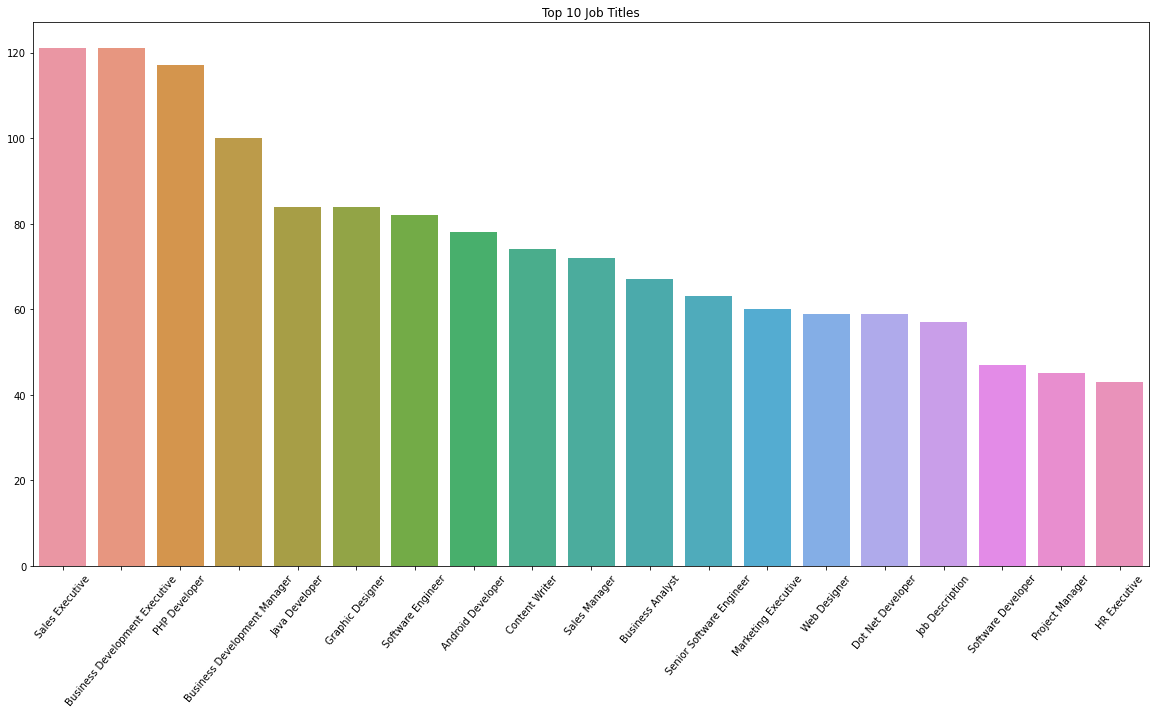

In [83]:
X = df['Job Title'].value_counts().head(20).index[1:]
Y = df['Job Title'].value_counts().head(20).values[1:]

plt.figure(figsize= (20,10))
sns.barplot(data = df, x= X ,y= Y)
plt.xticks(rotation= 50)
plt.title('Top 10 Job Titles')
plt.show()

In [84]:
df['Job Title'].value_counts().head(20)[1:]

Sales Executive                   121
Business Development Executive    121
PHP Developer                     117
Business Development Manager      100
Java Developer                     84
Graphic Designer                   84
Software Engineer                  82
Android Developer                  78
Content Writer                     74
Sales Manager                      72
Business Analyst                   67
Senior Software Engineer           63
Marketing Executive                60
Web Designer                       59
Dot Net Developer                  59
Job Description                    57
Software Developer                 47
Project Manager                    45
HR Executive                       43
Name: Job Title, dtype: int64

### 2. Create a pie chart to visualize experience wise vacancies

In [85]:
je = df['Job Experience Required'].value_counts()

In [87]:
level1 = df[(df['Job Experience Required (Minimum)'] >= 0) & (df['Job Experience Required (Maximum)'] <= 5)]

In [88]:
pie1 = level1['Job Experience Required'].count()

In [89]:
level2 = df[(df['Job Experience Required (Minimum)'] >= 5) & (df['Job Experience Required (Maximum)'] <= 10)]

In [90]:
pie2 = level2['Job Experience Required'].count()

In [91]:
level3 = df[(df['Job Experience Required (Minimum)'] >= 10) & (df['Job Experience Required (Maximum)'] <= 30)]

In [92]:
pie3 = level3['Job Experience Required'].count()

In [93]:
level4 = df[(df['Job Experience Required (Minimum)'] >= 30)]

In [94]:
pie4 = level4['Job Experience Required'].count()

In [95]:
pie = [pie1,pie2,pie3,pie4]

In [96]:
pie

[13354, 4292, 1908, 2]

In [97]:
labels=['between 0-5','between 5-10','between 10-30','above 30']

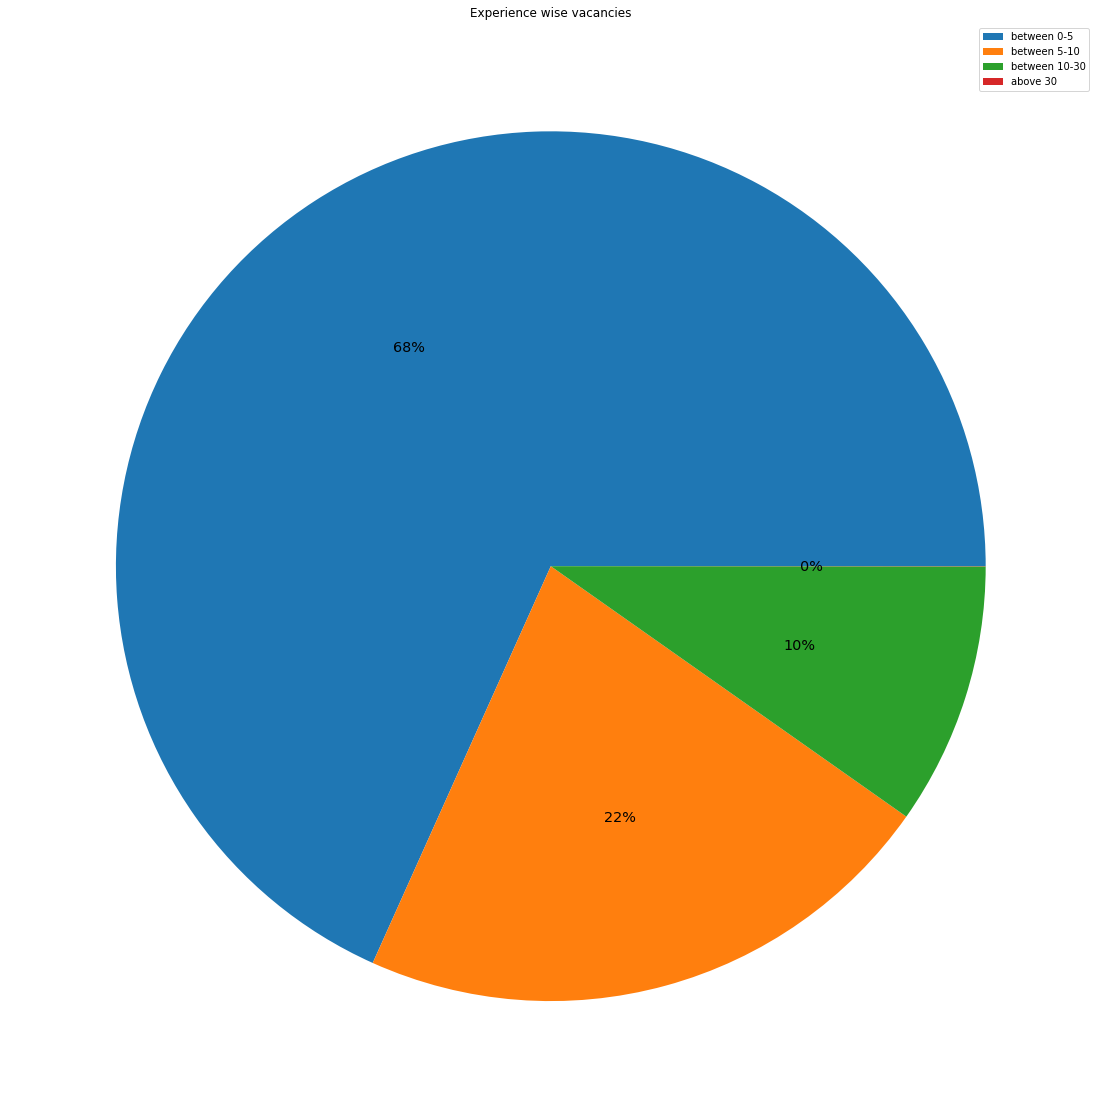

In [153]:
plt.figure(figsize=(20,20))
plt.pie(pie,autopct='%.0f%%', textprops={'size': 'x-large'})
plt.title('Experience wise vacancies')
plt.legend(labels)
plt.show()

### 3.Table for top 10 cities with most offers

In [99]:
df2['Location All'].value_counts().head(10)

Bengaluru    6862
Mumbai       5143
Pune         3502
Hyderabad    3273
Gurgaon      2911
Chennai      2546
Delhi        2059
Noida        2006
Delhi NCR    1960
Kolkata      1768
Name: Location All, dtype: int64

### 4.Top 5 skills requried

In [135]:
df3.Skills.value_counts().head(5)

Manager       2794
Sales         2579
Developer     2502
Executive     1533
Javascript    1445
Name: Skills, dtype: int64